<a href="https://colab.research.google.com/github/sadik-tofik/Assignment/blob/main/Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Feature Importance & Multicollinearity

In [3]:
# Install dependencies (if not already installed)
!pip install pandas scikit-learn statsmodels

In [4]:
# --- Imports ---
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier  # For feature importance
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For VIF

# --- Load cleaned data ---
df = pd.read_csv('titanic_cleaned.csv')  # Assuming you have the cleaned data in 'titanic_cleaned.csv'
X = df.drop(columns=['survived'])  # Features
y = df['survived']  # Target variable


# --- Feature Importance (Extra Trees Classifier) ---
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Extra Trees Classifier):\n", feature_importances)


# --- Multicollinearity Check (Variance Inflation Factor - VIF) ---
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nMulticollinearity Check (VIF):\n", vif_data)

# --- Interpretation ---
# - Feature Importance: Higher importance values indicate more influential features.
# - Multicollinearity (VIF): VIF values > 5 or 10 suggest potential multicollinearity issues.


Feature Importance (Extra Trees Classifier):
         Feature  Importance
11        alive    0.718741
9    adult_male    0.083134
1           sex    0.057626
8           who    0.046453
0        pclass    0.027855
7         class    0.023821
5          fare    0.012337
3         sibsp    0.008274
2           age    0.006869
4         parch    0.004040
12        alone    0.003991
6      embarked    0.003790
10  embark_town    0.003070

Multicollinearity Check (VIF):
         feature          VIF
0        pclass   577.560184
1           sex    10.104425
2           age     1.788209
3         sibsp     1.779719
4         parch     1.708297
5          fare     1.670789
6      embarked     2.744070
7         class  1347.984971
8           who    13.198895
9    adult_male    30.763710
10  embark_town     2.648468
11        alive     1.761451
12        alone     2.204692


# Assignment 2: Data Distributions & Visualization

In [6]:
# Install dependencies (if not already installed)
!pip install numpy matplotlib seaborn

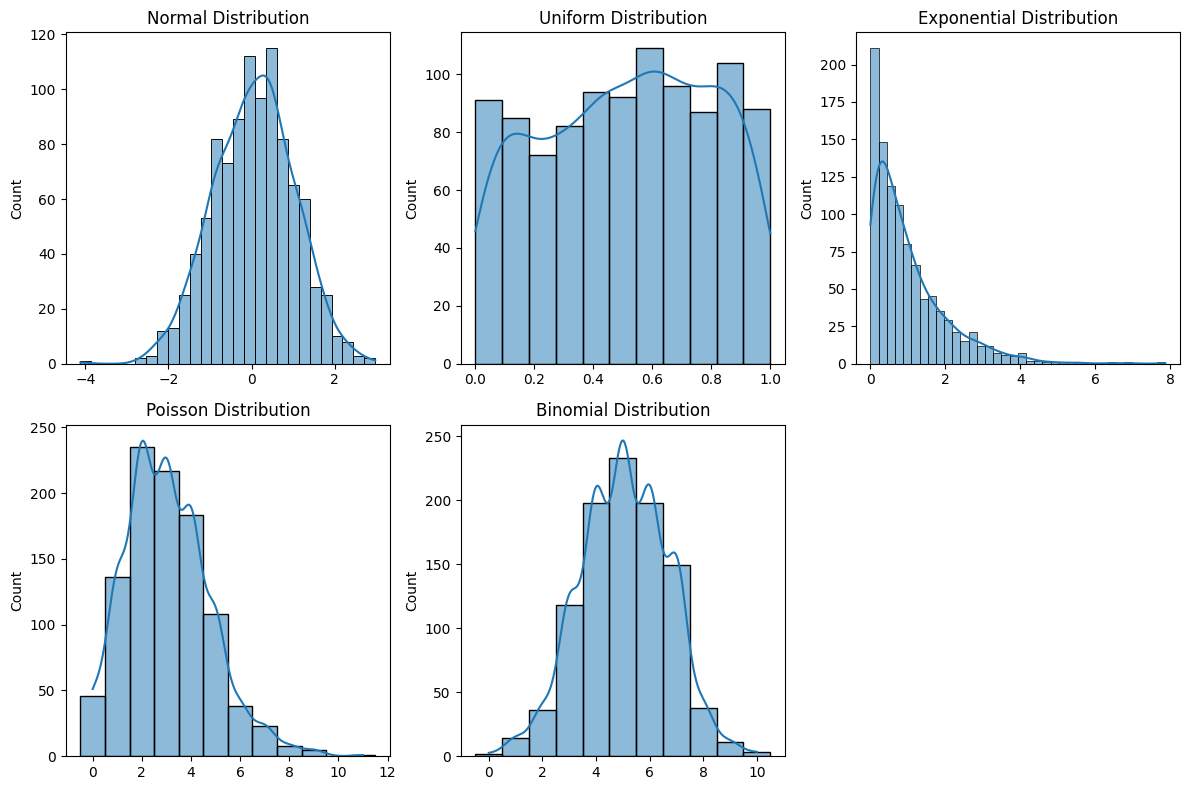

In [7]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Generate synthetic data for different distributions ---
n_samples = 1000  # Number of data points for each distribution

# 1. Normal Distribution
normal_data = np.random.normal(loc=0, scale=1, size=n_samples)

# 2. Uniform Distribution
uniform_data = np.random.uniform(low=0, high=1, size=n_samples)

# 3. Exponential Distribution
exponential_data = np.random.exponential(scale=1, size=n_samples)

# 4. Poisson Distribution
poisson_data = np.random.poisson(lam=3, size=n_samples)

# 5. Binomial Distribution
binomial_data = np.random.binomial(n=10, p=0.5, size=n_samples)


# --- Visualization ---
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(normal_data, kde=True)
plt.title('Normal Distribution')

plt.subplot(2, 3, 2)
sns.histplot(uniform_data, kde=True)
plt.title('Uniform Distribution')

plt.subplot(2, 3, 3)
sns.histplot(exponential_data, kde=True)
plt.title('Exponential Distribution')

plt.subplot(2, 3, 4)
sns.histplot(poisson_data, kde=True, discrete=True)  # discrete=True for Poisson
plt.title('Poisson Distribution')

plt.subplot(2, 3, 5)
sns.histplot(binomial_data, kde=True, discrete=True)  # discrete=True for Binomial
plt.title('Binomial Distribution')

plt.tight_layout()
plt.show()